In [255]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import rollingAnalysis
from datetime import datetime

sales = pandas.read_csv("sales.csv").drop('Unnamed: 0', axis = 1)
daily_sales = pandas.read_csv("daily_sales.csv")
orders = pandas.read_csv("orders.csv")

daily_sales.index = daily_sales["Unnamed: 0"].tolist()
daily_sales = daily_sales.drop('Unnamed: 0', axis = 1)

orders.index = orders["Unnamed: 0"].tolist()
orders = orders.drop('Unnamed: 0', axis = 1)

#convert ingredients to lists
sales["pizza_ingredients"] = sales["pizza_ingredients"].apply(lambda ingredients: ingredients.split(", "))

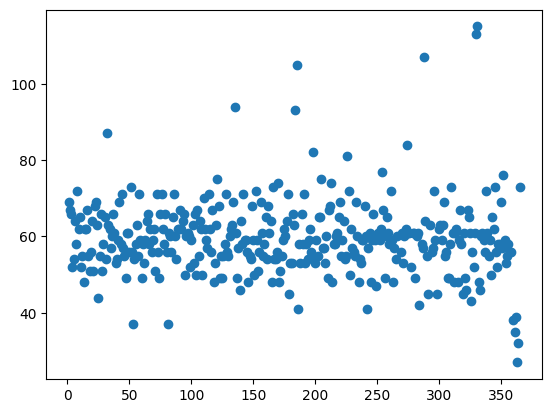

In [225]:
pyplot.scatter(x = daily_sales.index, y = daily_sales["order_count"])

In [226]:
daily_sales.loc[305]

order_count            55
item_count            124
revenue           1986.65
date           2015-11-01
weekday            Sunday
Name: 305, dtype: object

([<matplotlib.axis.XTick at 0x171c1e55100>,
 [Text(0, 0, 'January'),
  Text(60, 0, 'March'),
  Text(121, 0, 'May'),
  Text(182, 0, 'July'),
  Text(244, 0, 'Sept.'),
  Text(305, 0, 'Nov.')])

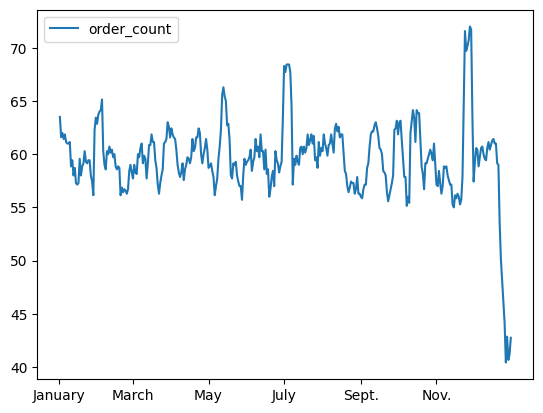

In [227]:
#let's take a look at the items sold per day as a rolling average
# choosing 3 here gives us exactly a 7 day rolling average
rollingAnalysis.plotRollingData(
    ["order_count"], daily_sales,
    3, direction="center"
)
pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
# there's a big drop in december
# otherwise, very little change in sales across the year

{'whiskers': [<matplotlib.lines.Line2D at 0x171c2200d70>,
 'caps': [<matplotlib.lines.Line2D at 0x171c22011f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171c2200b00>,
 'medians': [<matplotlib.lines.Line2D at 0x171c2201730>,
 'fliers': [<matplotlib.lines.Line2D at 0x171c2201a00>,
 'means': []}

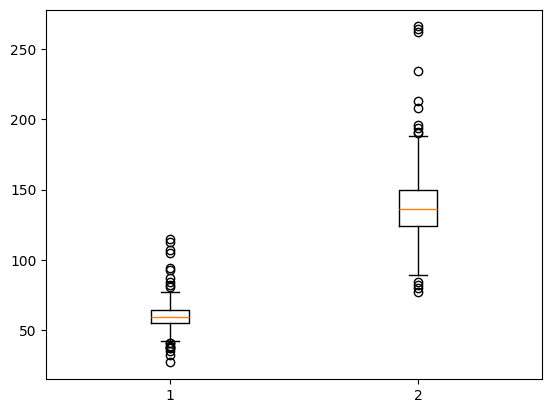

In [233]:
#let's find some outliers
pyplot.boxplot(x = [daily_sales["order_count"], daily_sales["item_count"]])

#this looks very normal/symmetrical around the inner 90%ish of values

In [239]:
#proceed to find outliers via 1.5IQR method 
order_q_25 = daily_sales["order_count"].quantile(0.25)
order_q_75 = daily_sales["order_count"].quantile(0.75)
order_iqr = order_q_75 - order_q_25
order_q_50 = daily_sales["order_count"].quantile(0.5)

high_orders = daily_sales[daily_sales["order_count"] > order_q_50 + 1.5*order_iqr]
low_orders = daily_sales[daily_sales["order_count"] < order_q_50 - 1.5*order_iqr]


item_q_25 = daily_sales["item_count"].quantile(0.25)
item_q_75 = daily_sales["item_count"].quantile(0.75)
item_iqr = item_q_75 - item_q_25
item_q_50 = daily_sales["item_count"].quantile(0.5)

high_items = daily_sales[daily_sales["item_count"] > item_q_50 + 1.5*item_iqr]
low_items = daily_sales[daily_sales["item_count"] < item_q_50 - 1.5*item_iqr]

In [240]:
low_items
# nearly all the lowest days are on sundays
# the lowest days near the end of the year are right after christmas.
# people do not order much pizza around that time apparently (notice the graph)

,order_count,item_count,revenue,date,weekday
81,37,77,1259.25,2015-03-22,Sunday
109,50,95,1527.95,2015-04-19,Sunday
179,45,95,1569.70,2015-06-28,Sunday
186,41,96,1591.45,2015-07-05,Sunday
242,41,94,1494.60,2015-08-30,Sunday
249,47,92,1491.65,2015-09-06,Sunday
326,43,84,1368.70,2015-11-22,Sunday
360,38,95,1643.05,2015-12-26,Saturday
361,35,89,1419.00,2015-12-27,Sunday
363,27,80,1353.25,2015-12-29,Tuesday


In [241]:
low_orders
# ditto from above

,order_count,item_count,revenue,date,weekday
25,44,102,1617.55,2015-01-25,Sunday
53,37,97,1579.95,2015-02-22,Sunday
81,37,77,1259.25,2015-03-22,Sunday
179,45,95,1569.70,2015-06-28,Sunday
186,41,96,1591.45,2015-07-05,Sunday
242,41,94,1494.60,2015-08-30,Sunday
284,42,118,1916.25,2015-10-11,Sunday
291,45,105,1795.30,2015-10-18,Sunday
298,45,114,1837.05,2015-10-25,Sunday
319,45,113,1821.65,2015-11-15,Sunday


In [242]:
high_items
# nearly all the highest days are on Thursday or Friday
# sunday february 1st has...no good explanation as far as i can tell, i dunno
# tuesday march 17th is st patricks day
# friday may 15th is "peace officers memorial day"
# can't tell for june 1st either
# 4th of july and 3rd of july had major spikes
# october 10th is a big standout, but i can't really see why?
# thanksgiving has a noticeable spike
# some very specific holidays have notable spikes as well

,order_count,item_count,revenue,date,weekday
32,87,191,3189.20,2015-02-01,Sunday
72,71,176,2786.65,2015-03-13,Friday
76,71,179,2965.30,2015-03-17,Tuesday
128,71,181,3052.30,2015-05-08,Friday
135,94,208,3386.15,2015-05-15,Friday
149,68,181,3001.20,2015-05-29,Friday
152,72,184,3067.75,2015-06-01,Monday
184,93,213,3443.00,2015-07-03,Friday
185,105,234,3864.20,2015-07-04,Saturday
198,82,187,3131.65,2015-07-17,Friday


In [243]:
high_orders
# ditto from above (mostly)

,order_count,item_count,revenue,date,weekday
32,87,191,3189.20,2015-02-01,Sunday
51,73,175,2891.15,2015-02-20,Friday
121,75,154,2571.95,2015-05-01,Friday
135,94,208,3386.15,2015-05-15,Friday
166,73,152,2595.60,2015-06-15,Monday
170,74,167,2793.45,2015-06-19,Friday
184,93,213,3443.00,2015-07-03,Friday
185,105,234,3864.20,2015-07-04,Saturday
198,82,187,3131.65,2015-07-17,Friday
205,75,196,3204.40,2015-07-24,Friday


In [252]:
daily_sales[["item_count", "order_count", "weekday"]].groupby("weekday").mean()

# thursday and saturday are more popular for ordering pizza
# friday, however, is even more popular

,item_count,order_count
weekday,,
Friday,164.840000,70.760000
Monday,135.104167,58.208333
Saturday,144.096154,60.730769
Sunday,116.057692,50.461538
Thursday,143.807692,62.288462
Tuesday,132.596154,57.173077
Wednesday,133.576923,58.153846


Thursday


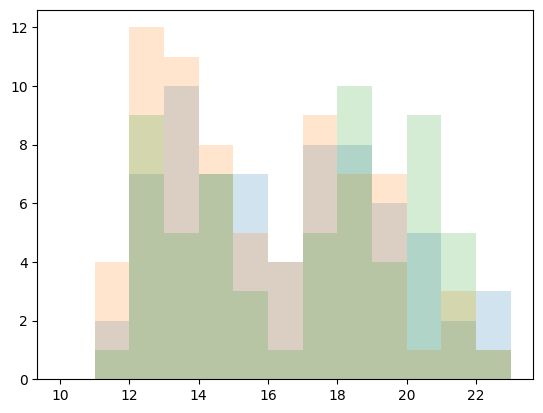

In [330]:
date_index = 29

for date_index in [1, 8, 36]:
    orders_this_day = orders[orders["order_date_index"] == date_index]
    order_times = orders_this_day["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)
    pyplot.hist(order_times, bins = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], alpha = 0.2)
print(orders_this_day.iloc[0]["order_date_weekday"])

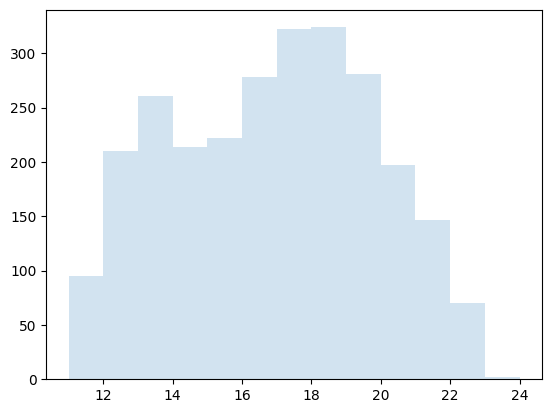

In [394]:
# Monday, Tuesday, Wednesday, and Thursday are pretty similar.
# first peak is 12 PM - 2 PM. second smaller peak rounds out at 5 PM - 7 PM

# Friday is somewhat similar to the other weekdays
# its first peak is 12 PM - 2 PM but its second peak is 5 PM - 8 PM
# that peak happens later in the day, and then more people order pizza as the night goes on than on weekdays

# Saturday has a peak at 1 PM - 2 PM
# then it rises significantly and peaks similar to friday at 5 PM - 8 PM.
# fridays have more sales because of the huge lunch rush that happens

# Sunday afternoon is most similar to Monday - Thursday, but the first peak happens at the same time as Saturday
# so first peak 1 PM - 2 PM, second peak 5 PM - 7 PM

# we can directly see that sales go up as the week goes on
# weekdays cause big lunch rushes
# weekends cause small lunch rushes
# if the day after is a weekend, pizzas are ordered later
# otherwise they are typically ordered a bit earlier

for weekday in ["Sunday"]:
    orders_this_weekday = orders[orders["order_date_weekday"] == weekday]
    order_times = orders_this_weekday["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)

    pyplot.hist(order_times, bins = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], alpha = 0.2)